# Passive Droplet in a chemical gradient in an $\infty ~3D$ domain

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
from scipy.ndimage import uniform_filter1d

In [3]:
import matplotlib.cm as cm

In [4]:
import os

In [5]:
import glob

In [6]:
import sympy as sym

from sympy.utilities.lambdify import lambdify

In [7]:
%config InlineBackend.figure_format ='retina'

plt.rcParams.update({'font.size': 25})

In [8]:
file = open("KAPPA.out", "r")
KAPPA = float(file.read())

file = open("GAMMA.out", "r")
GAMMA = float(file.read())

file = open("INTERFACE_WIDTH.out", "r")
W = float(file.read())

file = open("PREFACTOR_FREE_ENERGY_DENSITY.out", "r")
PREFACTOR_FREE_ENERGY_DENSITY = float(file.read())  

# This is value of b in f = (b/2)*c*c*(1-c)*(1-c)

file = open("MOBILITY.out", "r")
MOBILITY = float(file.read())

In [9]:
file = open("alpha.out", "r")
ALPHA = float(file.read())

file = open("beta.out", "r")
BETA = float(file.read())

In [10]:
file = open("C_bottom_CH.out", "r")
C_bottom_CH = float(file.read())

file = open("C_top_CH.out", "r")
C_top_CH = float(file.read())

file = open("mu_bottom_CH.out", "r")
mu_bottom_CH = float(file.read())

file = open("mu_top_CH.out", "r")
mu_top_CH = float(file.read())

############################################################

file = open("C_bottom_y_AGM.out", "r")
C_bottom_y_AGM = float(file.read())

file = open("C_top_y_AGM.out", "r")
C_top_y_AGM = float(file.read())

In [11]:
DIFFUSION = PREFACTOR_FREE_ENERGY_DENSITY * MOBILITY

K0 = DIFFUSION/(W**2)

In [12]:
file = open("R_critical_theory.out", "r")
R_critical_theory = float(file.read())

print('Critical radius is ', R_critical_theory)

print()

Critical radius is  3.333333333333333



In [13]:
initial_radius = float(np.load('initial_radius.npy'))

print('initial_radius is', initial_radius)

print()

initial_radius is 20.0



In [14]:
file = open("AGM_SYSTEM_SIZE.out", "r")

AGM_SYSTEM_SIZE = int(file.read())

AGM_SYSTEM_SIZE

844

In [15]:
file = open("limit_r.out", "r")

limit_r = int(file.read())

limit_r

400

In [16]:
file = open("limit_z.out", "r")

limit_z = int(file.read())

limit_z

1200

### Read the droplet radii and time from CH simulations

In [17]:
CH_radius = np.load('CH_droplet_radius.npy')

CH_time = np.load('CH_droplet_times.npy')

CH_droplet_z_location = np.load('CH_droplet_z_location.npy')

In [18]:
CH_time

array([0.0000000e+00, 1.0000000e+01, 2.0000000e+01, ..., 9.9800050e+03,
       9.9900050e+03, 1.0000005e+04])

In [19]:
CH_radius[0]

array([20.13474817, 20.15809765, 20.17962542, ..., 36.07810635,
       36.09130131, 36.10440651])

In [20]:
CH_droplet_z_location[0]

array([2.91621667e-04, 3.23276153e-03, 5.83410037e-03, ...,
       2.14316877e+00, 2.14539451e+00, 2.14738284e+00])

######################################################################################################################

### Read the droplet radii and time from AGM simulations

In [21]:
AGM_radius = np.load('Radius_X=20.1,S=20.1,L=20.1.npy')

AGM_time = np.load('Time_X=20.1,S=20.1,L=20.1.npy')

AGM_droplet_y_location = np.load('Y_location_X=20.1,S=20.1,L=20.1.npy')

In [22]:
AGM_time

array([0.00000e+00, 1.00000e+01, 2.00000e+01, ..., 9.98040e+03,
       9.99040e+03, 1.00004e+04])

In [23]:
AGM_radius[0]

array([20.        , 20.02141635, 20.04280354, ..., 37.76612374,
       37.78094309, 37.79575798])

In [24]:
AGM_droplet_y_location[0]

array([0.        , 0.00303902, 0.00607549, ..., 2.89856831, 2.90141203,
       2.90425569])

######################################################################################################################

### Growth rates and Drift speeds

In [25]:
AGM_dRbydT = np.gradient(AGM_radius[0])

AGM_dXbydT = np.gradient(AGM_droplet_y_location[0])

In [26]:
CH_dRbydT = np.gradient(CH_radius[0])
    
CH_dXbydT = np.gradient(CH_droplet_z_location[0])

In [27]:
CH_dRbydT, AGM_dRbydT

(array([0.02334948, 0.02243863, 0.02128168, ..., 0.01320473, 0.01315008,
        0.0131052 ]),
 array([0.02141635, 0.02140177, 0.02137423, ..., 0.01482159, 0.01481712,
        0.01481489]))

In [28]:
error_radius = abs((CH_dRbydT - AGM_dRbydT) / CH_dRbydT)

error_radius

array([0.08279094, 0.04620846, 0.00434841, ..., 0.12244515, 0.12677062,
       0.13045944])

In [29]:
error_position = abs((CH_dXbydT - AGM_dXbydT) / CH_dXbydT)

error_position

array([0.03328105, 0.09616919, 0.18911246, ..., 0.31641649, 0.34961616,
       0.43017565])

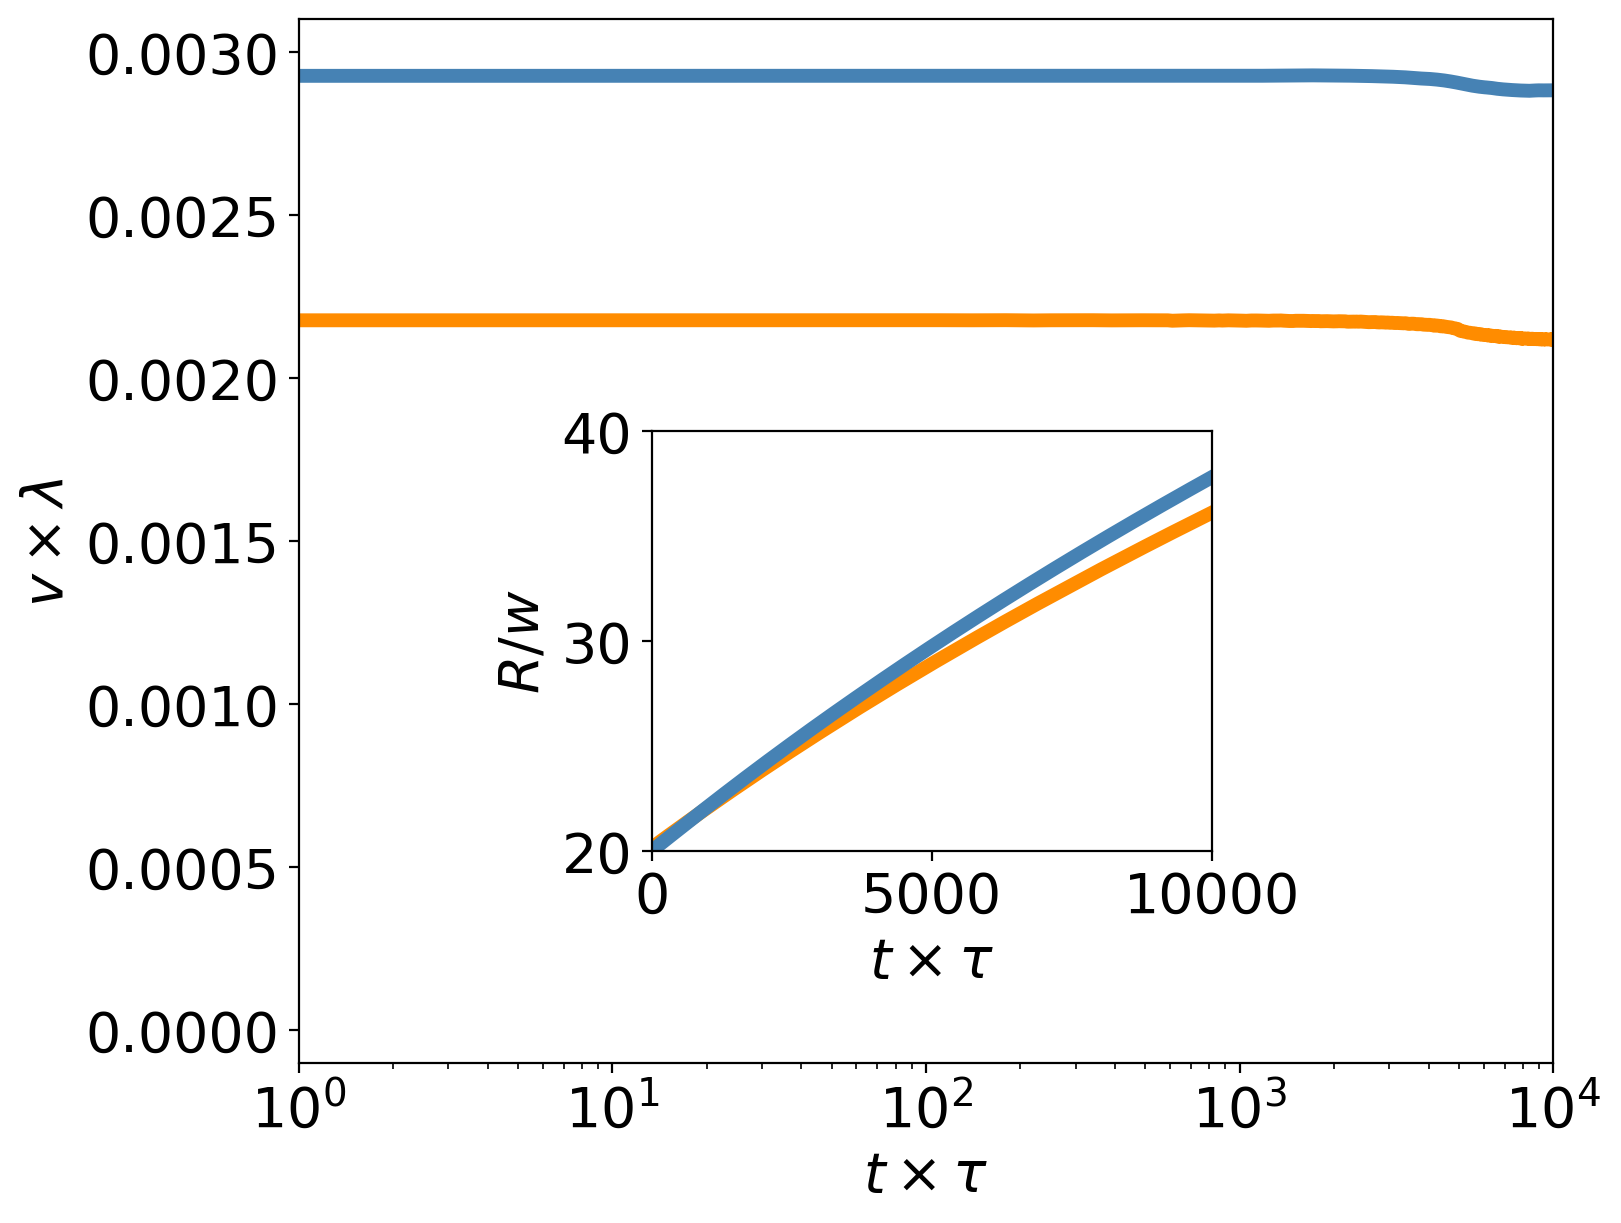

In [46]:
fig, ax = plt.subplots(figsize=(8, 6))

plt.style.use('default')

plt.rcParams['figure.constrained_layout.use'] = True

plt.rcParams.update({'font.size': 20})

################################################################################################################

sample_size = int(1e3)

ax.semilogx(CH_time, uniform_filter1d(CH_dXbydT, size = sample_size),
             'darkorange', linewidth = 5, label = 'Cahn-Hilliard Model')
ax.semilogx(AGM_time, uniform_filter1d(AGM_dXbydT, sample_size), 
             'steelblue', linewidth = 5, label = 'Effective Droplet Model')
ax.set_ylabel(r'$v \times \lambda$')
ax.set_xlabel(r'$t \times \tau$')
ax.set_xlim(1, 10000)
ax.set_ylim(-1e-4, 0.0031)

################################################################################################################

# inset
inset_ax = fig.add_axes([0.4, 0.3, 0.35, 0.35]) # X, Y, width, height

inset_ax.plot(CH_time, CH_radius[0], 'darkorange', linewidth = 5, label = 'Cahn-Hilliard Model')
inset_ax.plot(AGM_time, AGM_radius[0], 'steelblue', linewidth = 5, label = 'Effective Droplet Model')
inset_ax.set_xlabel(r'$t \times \tau}$')
inset_ax.set_ylabel(r'$R / w$')
inset_ax.set_xlim(0, 10000)
inset_ax.set_ylim(20, 40)

# set axis tick locations
# inset_ax.set_yticks([0, 0.005, 0.01])
# inset_ax.set_xticks([0.1, 0, 0.1]);

plt.savefig('drop_in_gradient.pdf')